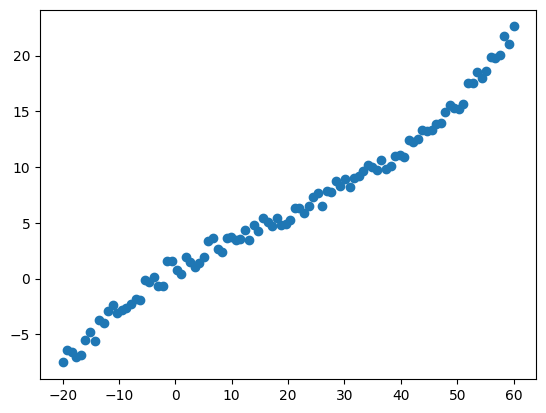

In [4]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)
    
x = data[:,0]
y = data[:,1]

def h_fun1(x, theta_0, theta_1):
    return theta_0 + theta_1*x

plt.scatter(x, y)
    

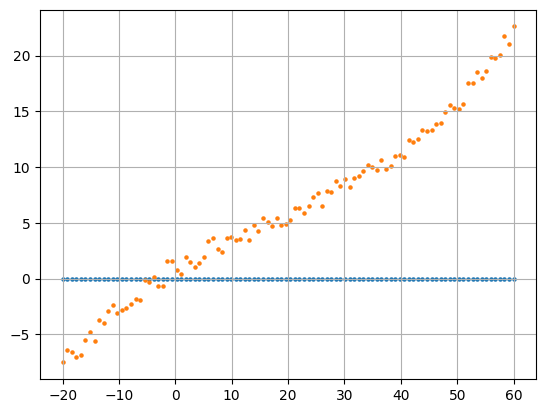

In [5]:
eps = 1e-7  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

plt.figure()
plt.scatter(x, h_fun1(x, theta_0, theta_1), s=5)
plt.scatter(x, y, s = 5)
plt.grid()
plt.show()

In [6]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0
ite = 0

def calculate_cost(x, y, theta_0, theta_1):

    h_fun_result = h_fun1(x, theta_0, theta_1)
    suma = np.sum(np.square(h_fun_result - y))
    
    return (1/(2*len(x))) * suma
    
    
cost = np.inf
while 1:
    grad_theta0 = (1/len(x))*np.sum(h_fun1(x, theta_0, theta_1) - y)
    
    h_vector = h_fun1(x, theta_0, theta_1)
    suma = 0
    for i in range(len(x)):
        suma += (h_vector[i] - y[i])*x[i]
    grad_theta1 = (1/len(h_vector))*suma
    
    theta_0 = theta_0 - alpha * grad_theta0
    theta_1 = theta_1 - alpha * grad_theta1
    
    previousCost = cost
    cost = calculate_cost(x, y, theta_0, theta_1)
    
    ite += 1
    if (previousCost - cost) < eps:
        break
        
print(theta_0)
print(theta_1)
print(cost)
print(ite)
        
        
    

0.006487626323699951
0.31538415117956237
0.6391740798950195
4


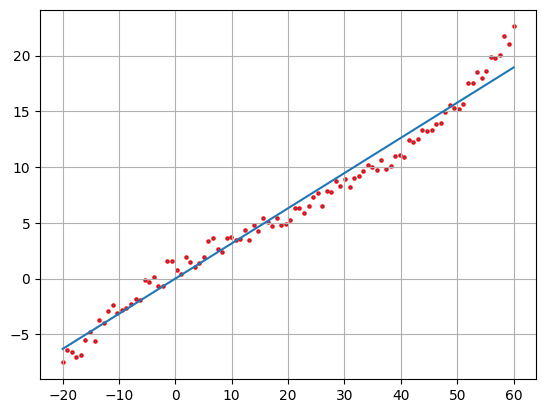

In [7]:
plt.figure()
plt.scatter(x, y, s=5, edgecolors="red")
plt.plot(x, h_fun1(x, theta_0, theta_1))
plt.grid()
plt.show()


(1, 100)
(2, 100)
[[0.00648763]
 [0.31538416]]
0.6391738572130962
8


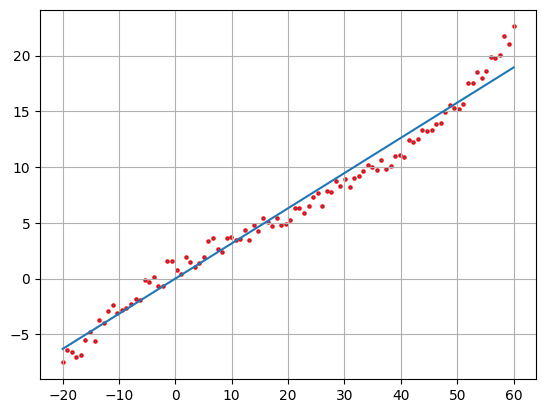

In [8]:
x = data[:,0]
y = data[:,1]

X = np.vstack([np.ones(x.shape), x])
y.shape = [1, -1]

print(y.shape)
print(X.shape)

def h_fun(X: np.ndarray, theta):
    return theta.T @ X

def calculate(X, y, theta):
    hFunResult = h_fun(X, theta)
    c = hFunResult - y
    gf = np.square(c)
    suma = np.sum(np.square(hFunResult - y))
    
    size = hFunResult.shape[1]
    return (1/(2*size)) * suma
    
theta = np.array([[0], [0]])
cost = 1
while 1:
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    
    m = h_y_diff.shape[1]
    theta = theta - ((alpha * gradient.T) / m) 
    
    previousCost = cost
    cost = calculate(X, y, theta)
    
    ite += 1
    if abs(previousCost - cost) < eps:
        break

print(theta)
print(cost)
print(ite)

plt.figure()
plt.plot(x, h_fun1(x, theta[0][0], theta[1][0]))
plt.scatter(x,y, s=5, edgecolors='red')
plt.grid()

In [9]:
with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)
    y = data2[:, 2]
    y.shape = [1, y.shape[0]]
    X = data2[:, 0:2]
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T

y_scale = y.max()
y = y / y_scale

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale
    
def h_fun(X: np.ndarray, theta):
    return theta.T @ X

def calculate(X, y, theta):
    hFunResult = h_fun(X, theta)
    c = hFunResult - y
    gf = np.square(c)
    suma = np.sum(np.square(hFunResult - y))
    
    size = hFunResult.shape[1]
    return (1/(2*size)) * suma
    
theta = np.array([[0], [0],[0]])
cost = 1
while 1:
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    
    m = h_y_diff.shape[1]
    theta = theta - ((alpha * gradient.T) / m) 
    
    previousCost = cost
    cost = calculate(X, y, theta)
    
    ite += 1
    if abs(previousCost - cost) < eps:
        break


print(ite)
example = np.array([[1], [1300], [4]])
h_example = theta.T @ (example/X_scale) * y_scale
print(f'koszt nieruchomosi o pow. {example[1][0]} z l. pok. {example[2][0]} oszacowany na {h_example[0][0]}')

1157
koszt nieruchomosi o pow. 1300 z l. pok. 4 oszacowany na 296090.6397107442


In [12]:
x = data[:,0]
y = data[:,1]

X = np.vstack([np.ones(x.shape), x, x**2, x**3])
alpha = 0.001

eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0], [0], [0]])

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale
 
y.shape = [1, -1]
y_scale = y.max()
y = y / y_scale


def h_fun(X: np.ndarray, theta):
    return theta.T @ X

def calculate(X, y, theta):
    hFunResult = h_fun(X, theta)
    c = hFunResult - y
    gf = np.square(c)
    suma = np.sum(np.square(hFunResult - y))
    
    size = hFunResult.shape[1]
    return (1/(2*size)) * suma
    
theta = np.array([[0], [0],[0],[0]])
cost = 1
while 1:
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    
    m = h_y_diff.shape[1]
    theta = theta - ((alpha * gradient.T) / m) 
    
    previousCost = cost
    cost = calculate(X, y, theta)
    
    ite += 1
    if abs(previousCost - cost) < eps:
        break

print(theta)


KeyboardInterrupt: 

[[-7.09437532 -6.69481301 -6.30444997 -5.92307068 -5.55045947 -5.18640022
  -4.83067812 -4.48307717 -4.14338162 -3.8113759  -3.48684434 -3.16957094
  -2.85934078 -2.55593782 -2.25914643 -1.96875098 -1.68453562 -1.40628506
  -1.13378348 -0.86681523 -0.60516458 -0.34861596 -0.09695381  0.15003767
   0.39257402  0.63087094  0.86514405  1.09560905  1.32248152  1.5459771
   1.76631148  1.98370043  2.19835934  2.41050399  2.62035016  2.82811323
   3.034009    3.23825308  3.44106115  3.6426491   3.84323207  4.04302593
   4.24224644  4.44110911  4.63982968  4.8386237   5.03770693  5.23729503
   5.43760343  5.6388481   5.84124497  6.04500861  6.25035551  6.45750102
   6.6666609   6.87805064  7.09188608  7.3083828   7.52775664  7.75022286
   7.97599731  8.20529574  8.43833383  8.67532688  8.91649126  9.1620417
   9.41219341  9.66716448  9.92716784 10.19242109 10.46313793 10.73953633
  11.02183103 11.31023574 11.60496935 11.90624465 12.21427923 12.52928717
  12.85148622 13.18108981 13.51831591 13

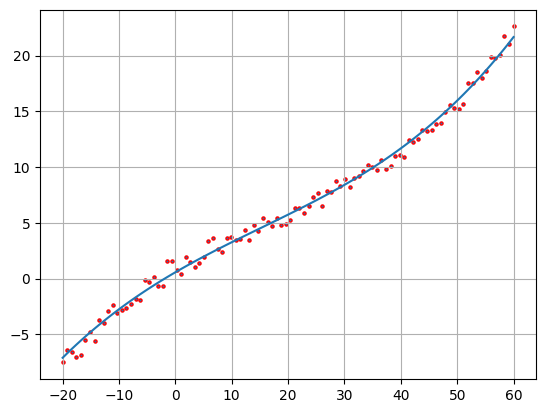

In [11]:


X = np.vstack([np.ones(x.shape), x, x**2, x**3])
X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale

vecY = h_fun(X, theta) * y_scale
print(vecY)
plt.figure()

X = np.vstack([np.ones(x.shape), x, x**2, x**3])

plt.plot(np.array([X[1]])[0], vecY[0])
plt.scatter(x, y*y_scale,s=5, edgecolors='red')
plt.grid()


